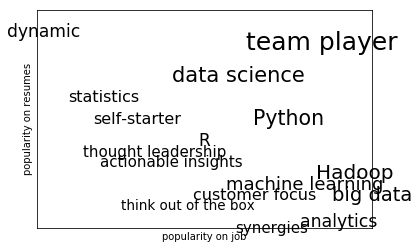

In [7]:
#Natural language process
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]
def txt_size(total):
    return 8 + total/ 200 * 20
%matplotlib inline
import matplotlib.pyplot as plt

for word , job_p,resume_p in data:
    plt.text(job_p,resume_p ,word ,ha = "center", va = "center",size = txt_size(job_p + resume_p))
plt.xlabel("popularity on job")
plt.ylabel("popularity on resumes")
plt.axis([0,100,0,100])
plt.xticks([])
plt.yticks([])
plt.show()


In [57]:
def fix_unicode(txt):
    return txt.replace(u"\2019","'")
import re
from bs4 import BeautifulSoup
import requests
from collections import defaultdict

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html,"html5lib")


content = soup.find("div","article-body")
regex = r"[\w']+|[\.]"
document = []
for para in content("p"):
    words = re.findall(regex,fix_unicode(para.text))
    document.extend(words)
#print(document)
bigrams = zip(document,document[1:])
trans = defaultdict(list)
for prev ,current in bigrams:
    trans[prev].append(current)
# print(trans)
import random
    
def gene_bigrams():
    current = "."
    result = []
    for i in range(100):
#         while True:
        next_word_cand = trans[current]
        current = random.choice(next_word_cand)
        result.append(current)
        if current == "." :
             " ".join(result)
    script =""
    for word in result:
        script += (word + " ")
    return script
print(gene_bigrams())

You don t really a discipline in . It is how Google has been easy to Mike Driscoll dataspora statistics is an even getting data they use it s office extracting addresses to traditional analysis and other people and the publishing industry is an excellent way to process . Many of grant money generating data is showing up that data . In addition to latitude and made the vanguard but fairly well defined problems . Many Eyes many sides of the performance and so products from users search across thousands of a solution . They group together at this sounds 


In [58]:
trigrams = zip(document,document[1:],document[2:])
trigram_trans = defaultdict(list)
starts = []
for prev ,current ,next in trigrams:
    if prev == ".":
        starts.append(current)
    trigram_trans[(prev,current)].append(next)
# print(trigram_trans ,starts)
def gene_trigram():
    current = random.choice(starts)
    prev = "."
    
    result = [current]
    while True:
#         print(trigram_trans[(prev,current)])
        next_word_cand = trigram_trans[(prev,current)]
        next_word = random.choice(next_word_cand)
        
        prev,current  = current , next_word
        result.append(current)
        
        if current == ".":
            return " ".join(result)
gene_trigram()

'Point of sale devices and frequent shopper s cards make it tell its story .'

In [65]:
#gibsson sampling
def roll_a_die():
    return random.choice([1,2,3,4,5,6])
def random_y(x):
    return x + roll_a_die()
def random_x(y):
    if y <= 7 :
        return random.randrange(1,y)
    else:
        return random.randrange(y-6,7)
def gibbs_samples(n_iter=100):
    x,y =1,2
    for _ in range(n_iter):
        x = random_x(y)
        y = random_y(x)
    return x,y
def direct_samples():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1+d2
def compare(n_samples=100000):
    counts = defaultdict(lambda:[0,0])
    for _ in range(n_samples):
        counts[gibbs_samples()][0] += 1
        counts[direct_samples()][1] += 1
    return counts

print(compare())

defaultdict(<function compare.<locals>.<lambda> at 0x000001500C0051E0>, {(2, 6): [2812, 2699], (6, 10): [2803, 2776], (1, 7): [2832, 2795], (3, 6): [2668, 2694], (2, 3): [2727, 2722], (1, 5): [2879, 2736], (1, 4): [2797, 2779], (3, 5): [2732, 2806], (4, 6): [2841, 2863], (3, 7): [2726, 2807], (5, 9): [2694, 2831], (5, 6): [2759, 2771], (1, 2): [2846, 2761], (3, 9): [2847, 2798], (4, 9): [2757, 2781], (6, 11): [2780, 2750], (5, 7): [2811, 2729], (6, 9): [2776, 2822], (5, 10): [2899, 2676], (6, 7): [2732, 2767], (2, 8): [2674, 2835], (5, 11): [2881, 2754], (4, 5): [2810, 2823], (6, 8): [2769, 2834], (2, 4): [2650, 2808], (2, 5): [2831, 2836], (3, 8): [2716, 2875], (3, 4): [2798, 2818], (4, 8): [2754, 2726], (2, 7): [2757, 2733], (6, 12): [2758, 2780], (1, 3): [2769, 2684], (4, 10): [2756, 2811], (4, 7): [2789, 2836], (1, 6): [2720, 2668], (5, 8): [2850, 2816]})


In [11]:
def sample_from(w):
    total = sum(w)
    rnd = total * random.random()
    for i , j in enumerate(w):
        rnd -= j
        if rnd <= 0:
            return i
from collections import Counter
import random
doc = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]
K = 4
doc_topic_counts = [Counter() for _ in doc]
topic_word_counts = [Counter() for _ in range(K)]
topic_counts = [0 for _ in range(K)]
doc_length = list(map(len,doc))
dist_words = set([word for d in doc for word in d])
W = len(dist_words) #単語の数
D = len(doc) #document の数

# print(topic_counts)
def p_topic_given_doc(topic,d,alpha = 0.2):
    return ((doc_topic_counts[d][topic]+ alpha)/(doc_length[d] + K * alpha))

def p_word_given_topic(word,topic,beta= 0.1):
    return ((topic_word_counts[topic][word]+beta)/(topic_counts[topic]+ W + beta))

def topic_weight(d,word,k):
    return p_word_given_topic(word,k) * p_topic_given_doc(k,d)

def choose_new_topic(d,word):
    return sample_from([topic_weight(d,word,k)for k in range(K)])
    
doc_topics = [[random.randrange(K) for word in d] for d in doc]
for d in range(D):
    for word ,topic in zip(doc[d],doc_topics[d]):
        doc_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] +=1
        topic_counts[topic] += 1
        
for iter in range(1000):
    for d in range(D):
        for i ,(word ,topic) in enumerate(zip(doc[d],doc_topics[d])):

            doc_topic_counts[d][topic] -=1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            doc_length[d] -= 1

            new_topic = choose_new_topic(d,word)
            doc_topics[d][i] = new_topic

            doc_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            doc_length[d] += 1
        
for k, word_counts in enumerate(topic_word_counts):
    for word ,count in word_counts.most_common():
        if count > 0:
            print(k,word,count)

0 HBase 3
0 Cassandra 2
0 Postgres 2
0 MongoDB 2
0 databases 1
0 NoSQL 1
0 MySQL 1
1 Java 3
1 scikit-learn 2
1 pandas 2
1 numpy 1
1 programming languages 1
1 support vector machines 1
1 Spark 1
1 Hadoop 1
2 Python 4
2 R 4
2 statistics 3
2 probability 3
2 statsmodels 2
2 regression 1
2 deep learning 1
2 mathematics 1
2 theory 1
2 scipy 1
3 Big Data 3
3 machine learning 2
3 artificial intelligence 2
3 neural networks 2
3 C++ 2
3 regression 2
3 libsvm 2
3 Storm 1
3 deep learning 1
3 Hadoop 1
3 Haskell 1
3 Mahout 1
3 MapReduce 1
3 decision trees 1
